# **AP155 Lab Assignment**
## Module 3: Fourier Transforms

_Instructions_: Answer each problem as completely as you can. Discuss **all** your answers as clearly and concisely as possible.

_Scoring Criteria_: 50% - *correctness of code*; 50% - *discussion of the code and results*. Maximum score is **100 points**.


### Student Information

_Full Name (Last Name, First Name)_: Thoreenz Soldevilla\
_Student No._: 2021-04225\
_Section_: THQ-HX-1

### Submission Information

_Date and Time Submitted (most recent upload)_: 11/16/23, 1:00 PM

**HONOR PLEDGE** I affirm that I have upheld the highest principles of honesty and integrity in my academic work and that this lab assignment is my own work.

**Sign here with your full name:** Thoreenz Soldevilla

### Grading Information (c/o Lab Instructor)

TOTAL SCORE: **[]**/100

Score breakdown:
* Problem 1 - []/30
* Problem 2 - []/70

_Date and Time Scored (MM/DD/YYYY HH:MM AM/PM):_ 

### PROBLEM 1
**Fourier transform of a simple function**

1. Calculate the coefficients in the discrete Fourier transforms of the modulated sine wave $y_n = \sin(\pi n/N) sin(20\pi n/N)$ sampled at $N = 1000$ evenly spaced points using your own user-defined function. *(15 pts.)*

2. Make a plot of their amplitudes similar to the plot shown in Fig. 7.4 of the Newman text. *(15 pts.)*

We first implement the libraries needed for the problem needed. In order for us to use trigonometry we have to use the $\tt cmath$ module.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from cmath import *

We define $y_n$ as a function $\tt f1()$ that takes $x$ and $N$ as arguments. We then make an array of 1000 points (from 0 to 1000) and use these points to get the values for $y_n$. All these values are to be put into another array $\tt f1ydata$.

In [87]:
def f1(x, N):
    return sin(pi*x/N)*sin(20*pi*x/N) # Defining the function
f1_xdata = np.linspace(0, 1000, 1000) # Creating a discrete set of integers from 0 to 1000.
f1_ydata = [] # Defining the array that will store the values after the function f1 acts upon them.
for i in range(len(f1_xdata)): # Appending the corresponding y-values.
    f1_ydata.append(f1(i, 1000))

We then transform $y_n$ into the frequency domain using the Discrete Fourier Transform (DFT) method. Each frequency corresponds to a certain coefficient $c_k$ that determines its prevalence among the function. This is defined as:
$$c_k = \sum^{N-1}_{n=0}y_{n}\exp{(-i\frac{2\pi{}kn}{N})}$$,
Where $y_n$ is the value from the $\tt f1ydata$ array, and $N$ is the length of the array.

In [88]:
def dft(y):
    N = len(y) # Length of the data array
    c = np.zeros(N//2+1, complex) # Length of the Frequency Domain
    for k in range(N//2+1): 
        for n in range(N):
            c[k] += y[n]*exp(-2j*pi*k*n/N) # Applying DFT to each data point described in f1(x,N)
    return c # Returns the DFT array

Let us compare the time domain and the frequency domain of the function $\tt f1(x,N)$. We first plot the original wave in the time domain.

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


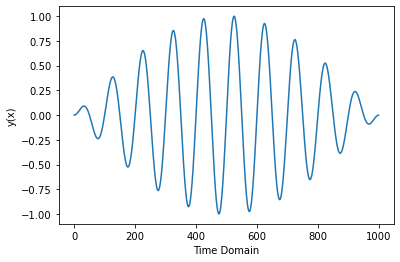

In [97]:
plt.plot(f1_xdata, f1_ydata)
plt.ylabel('y(x)')
plt.xlabel('Time Domain')
plt.show()

Next, we plot the frequency domain.

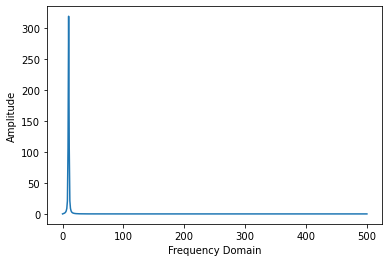

In [96]:
plt.plot(np.abs(dft(f1_ydata)))
plt.xlabel('Frequency Domain')
plt.ylabel('Amplitude')
plt.show()

We see that there is a peak within the 0-20th frequency. Let us zoom in on that part. We then indicate the data points that correspond to each discrete frequency.

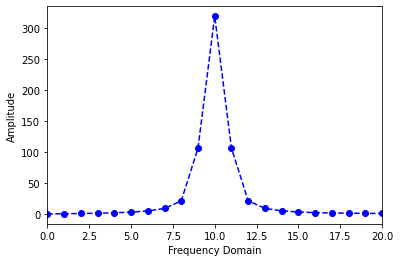

In [95]:
plt.plot(np.abs(dft(f1_ydata)), 'bo--')
plt.xlim(0,20)
plt.xlabel('Frequency Domain')
plt.ylabel('Amplitude')
plt.show()

Recall that the fourier transform is able to translate a periodic function into a summation of sine and cosine waves. Here, we see that the function is a summation of waves mainly found within the 1-20 frequency range.

Let us see if we can retrieve the wavefunction with only three main waves. Note that we can retrieve back $y_n$ using $$ y_n = \frac{1}{N}\sum^{N-1}_{k=0}c_{k}\exp{(i\frac{2\pi{}kn}{N})}$$
where $c_k$ is the amplitude coefficient of the dominant waves.

Let us derive the amplitude of the frequencies of the 1-20th range.

In [8]:
f1_ydata_ft = dft(f1_ydata)
f1_ydata_ft[0:20]

array([ 4.42738565e-14  +0.j        , -1.95000266e-14  +0.32645282j,
        5.17427355e-15  +0.69469161j,  3.90909093e-16  +1.16078813j,
        3.06165412e-14  +1.81941714j,  7.75681602e-15  +2.86118021j,
        3.13431193e-14  +4.74138439j, -2.59828780e-14  +8.81897506j,
       -1.84815000e-14 +20.97485977j,  2.67020293e-14+105.88270624j,
        5.47917831e-15-318.50895449j, -2.50875221e-13+105.92274503j,
       -3.40377412e-14 +21.0561576j , -3.01386520e-15  +8.94406678j,
       -2.33181530e-14  +4.91432226j, -2.81214938e-15  +3.08787616j,
        2.12658396e-14  +2.10818122j,  3.88100197e-14  +1.52316082j,
       -2.11859610e-14  +1.14673944j, -1.71089542e-14  +0.89082855j])

We then define a function using three frequencies, that of 9, 10 and 11. Let's define them as:
$$y_m = \frac{1}{N}[c_{9}\exp(\frac{i2\pi(9)m}{N})+
c_{10}\exp(\frac{i2\pi(10)m}{N})+
c_{11}\exp(\frac{i2\pi(11)m}{N})]$$

Looking at the array output above, we can see that the amplitude of frequency 10 is roughly equal to -318.5, while frequencies 9 and 11 consitute an amplitude of 106.

In [67]:
def f2(x, N):
    return (1/N)*(-318.5*exp(2j*pi*10*x/N)+106.0*(exp(2j*pi*9*x/N))+106.0*(exp(2j*pi*11*x/N)))# Defining the function
f2_xdata = np.linspace(0, 1000, 1000) # Creating a discrete set of integers from 0 to 1000.
f2_ydata = [] # Defining the array that will store the values after the function f1 acts upon them.
for i in range(len(f2_xdata)): # Appending the corresponding y-values.
    f2_ydata.append(f2(i, 1000))

We then plot the new $y_m$ and check if it is the same with the initial $y_n$.

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


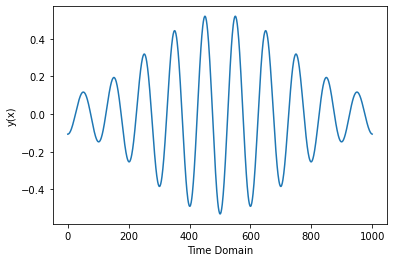

In [98]:
plt.plot(f2_xdata, f2_ydata)
plt.ylabel('y(x)')
plt.xlabel('Time Domain')
plt.show()

We see that $y_m$ can be a good approximation of $y_n$ using only **three** frequencies. Hence, we can infer that:
$$y_n = \sin(\pi n/N) sin(20\pi n/N) \simeq \frac{1}{N}[c_{9}\exp(\frac{i2\pi(9)m}{N})+
c_{10}\exp(\frac{i2\pi(10)m}{N})+
c_{11}\exp(\frac{i2\pi(11)m}{N})$$
sampled at $N=1000$.

### PROBLEM 2

**Fourier filtering**

For this problem, you will use data from a text file called $\tt dow.txt$. It contains the daily closing value for each business day from late 2006 until the end of 2010 of the Dow Jones Industrial Average, which is a measure of average prices on the US stock market.

First, you need to make a copy of the file $\tt dow.txt$ and save it to a folder in your **own Google Drive**. This file is available from the AP155 Course Pack Google Drive (in the Course Pack > Datasets folder).

The code cells below will (1) mount Google Drive and (2) load the data from your Google Drive. Follow the instructions below to load the data. Then, do the following:

1. Plot the data on a graph. *(10 pts.)*

2. Calculate the coefficients of the discrete Fourier transform of the data using the function $\tt rfft$ from numpy's $\tt fft$ library, which produces an array of $\frac{1}{2}N +1$ complex numbers. *(20 pts.)*

3. Now set all but the first 10% of the elements of this array to zero (i.e., set the last 90% to zero but keep the values of the first 10%). *(10 pts.)*

4. Calculate the inverse Fourier transform of the resulting array, zeros and all, using the function $\tt irfft$, and plot it on the same graph as the original data. You may need to vary the colors of the two curves to make sure they both show up on the graph. Comment on what you see. What is happening when you set the Fourier coefficients to zero? *(30 pts.)*

Use numpy's $\tt loadtxt$ function ([documentation](https://numpy.org/doc/stable/reference/generated/numpy.loadtxt.html)) to load the $\tt dow.txt$ file and save the data into a numpy array named $\tt dow$.

In [10]:
dow = np.loadtxt("dow.txt")

Print out the first 10 elements of the array $\tt dow$. Check that you get the ff. output:
```
array([12121.71, 12136.44, 12226.73, 12221.93, 12194.13, 12283.85, 12331.6 , 12309.25, 12278.41, 12307.48])
```

In [11]:
dow[0:10]

array([12121.71, 12136.44, 12226.73, 12221.93, 12194.13, 12283.85,
       12331.6 , 12309.25, 12278.41, 12307.48])

Now you can start to write code for this problem!

We plot $\tt dow.txt$ to check the graph.

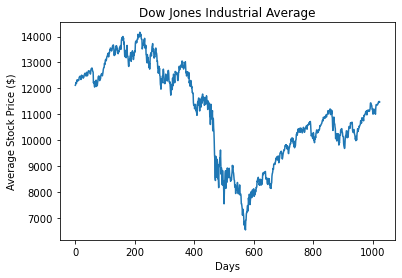

In [85]:
plt.plot(dow)
plt.title('Dow Jones Industrial Average')
plt.xlabel('Days')
plt.ylabel('Average Stock Price ($)')
plt.show()

We see here that the average prices plummeted starting with the 400th day before it rebounded around the 600th day. This reflected the 2007-2008 financial crisis in the United States that was ignited by the downfall of its housing market [1]. 
Let us transform this data into the frequency domain using the fast fourier transform module in numpy. We use the function $\tt rrft$.

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


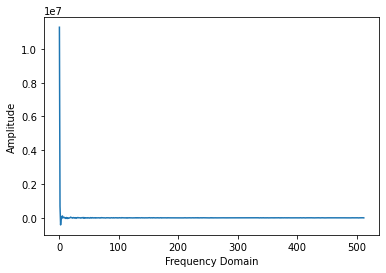

In [100]:
dow_ft = np.fft.rfft(dow)
plt.plot(dow_ft)
plt.ylabel('Amplitude')
plt.xlabel('Frequency Domain')
plt.show()

We then clean 90% of the data starting from its 'tail'.

In [103]:
dow_ft_2 = np.copy(dow_ft) # Copying FFT data into new array
for i in range(len(dow_ft_2)-(len(dow_ft_2)//10)): # Defining the 90% range (100 - 10)
    ind = -i-1 # Starting index of [-1] and subsequent subtraction of indices
    dow_ft_2[ind] = 0

We then retrieve back the data using the inverse fast fourier transform function, described by $\tt irfft$. We plot the initial data at the background and plot the new data on the foreground.

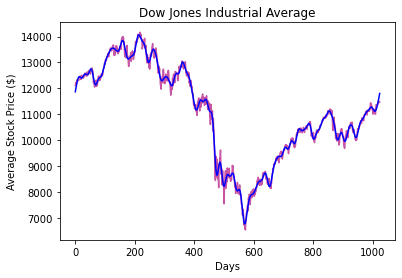

In [101]:
dow_2 = np.fft.irfft(dow_ft_2)
plt.plot(dow, color='#c754a4')
plt.plot(dow_2, color='blue')
plt.title('Dow Jones Industrial Average')
plt.xlabel('Days')
plt.ylabel('Average Stock Price ($)')
plt.show()

We see that the data is "cleaner" than before. The 90% data points that we cleared coincide with wavefunctions of high frequency but small amplitude. We call them as **white noise**. This helps us retain the salient points of data in a more simple manner.

Reference:\
[1] https://www.americanprogress.org/article/2008-housing-crisis/ 